In [ ]:
#Задачи
#Загрузите датасет transaction_data.csv. Проверьте размер таблицы, типы переменных, число пропущенных значений 
#и описательную статистику.

#Какие значения находятся в колонке transaction? Сколько наблюдений относятся к тому или иному уровню? 
#Визуализируйте результат с помощью барплота. Подумайте, как можно улучшить график.

#Сколько транзакций завершились ошибкой?

#Сколько успешных транзакций осуществил каждый из пользователей? Постройте гистограмму распределения числа 
#успешных транзакций.


#Коллега прислал Вам обновленные данные. Постройте сводную таблицу user_vs_minute_pivot, где в качестве столбцов
#будут использованы имена пользователей, строк – минуты, значений – число совершенных операций в указанную
#минуту. Пропущенные значения заполните нулями.
#Изучите представленный график. Помогите коллеге разобраться,  есть ли в данных ошибка, или же всё хорошо.


#Если в данные закралась ошибка, исправьте её и сохраните правильное число минут, прошедших с начала дня, в колонку true_minute.

In [ ]:
#Загрузите датасет transaction_data.csv. Проверьте размер таблицы, типы переменных, число пропущенных значений 
#и описательную статистику.

In [25]:
import pandas as pd
import seaborn as sns

In [2]:
transaction_data = pd.read_csv('C:/Users/makhatyrov_victor/python/Carpov_courses/lesson5/transaction_data.csv')

In [4]:
#размер data frame
transaction_data.shape

(5315, 3)

In [6]:
#типы данных Series
transaction_data.dtypes

date           object
name           object
transaction    object
dtype: object

In [10]:
#описательная статистика dataframe
transaction_data.describe()

,date,name,transaction
count,5315,5315,5315
unique,3373,56,3
top,2020-03-02 00:33:10,Masha_Ozerova,successfull
freq,6,112,3692


In [16]:
#узнать сколько пропущенных значений
transaction_data.isna().sum()

date           0
name           0
transaction    0
dtype: int64

In [ ]:
#Какие значения находятся в колонке transaction? Сколько наблюдений относятся к тому или иному уровню? 
#Визуализируйте результат с помощью барплота. Подумайте, как можно улучшить график.

In [33]:
#группируем по transaction и находим кол-во по каждому из пунктов
transaction_count = transaction_data.groupby('transaction', as_index=False)\
    .agg({'name':'count'}) \
    .rename(columns={'name':'count'}) #переименуем на более подходящий столбец

<Axes: xlabel='transaction', ylabel='count'>

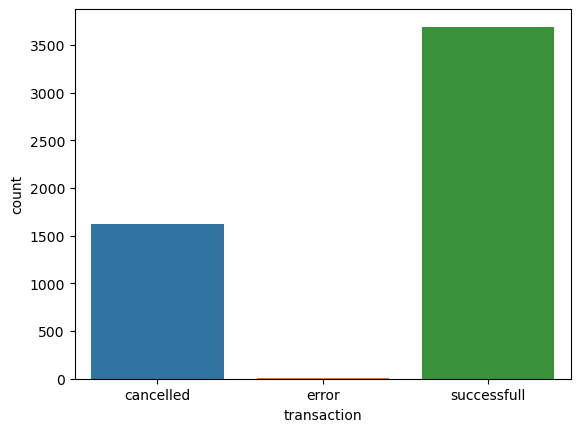

In [36]:
#строим график 
sns.barplot(data=transaction_count, x='transaction', y='count')

In [37]:
transaction_count

,transaction,count
0,cancelled,1619
1,error,4
2,successfull,3692


In [38]:
#Сколько успешных транзакций осуществил каждый из пользователей? Постройте гистограмму распределения числа 
#успешных транзакций.

In [47]:
succesfull_transaction_user = transaction_data.query('transaction == "successfull"')\
    .groupby('name', as_index=False) \
    .agg({'transaction':'count'}) \
    .sort_values('transaction')

C:\Users\makhatyrov_victor\AppData\Local\Temp\ipykernel_11324\3027571705.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(succesfull_transaction_user.transaction)


<Axes: xlabel='transaction', ylabel='Density'>

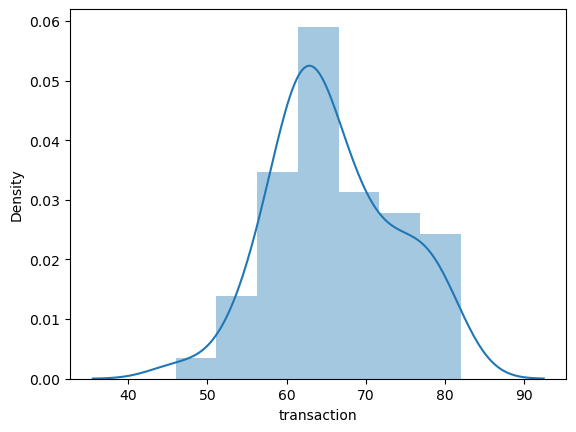

In [56]:
#строим график по транзакциям по x и доля пользователей по y
sns.distplot(succesfull_transaction_user.transaction)

In [59]:
#смотрим статистику по транзакциям, процентили, среднее значение и тд
succesfull_transaction_user.transaction.describe()

count    56.000000
mean     65.928571
std       7.787769
min      46.000000
25%      61.000000
50%      64.000000
75%      72.000000
max      82.000000
Name: transaction, dtype: float64

In [73]:
transaction_data

,date,name,transaction,minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17
...,...,...,...,...
5310,2020-03-02 00:09:28,Vasilisa_Fedorova,successfull,9
5311,2020-03-02 00:46:31,Vasilisa_Ozerova,successfull,46
5312,2020-03-02 00:16:38,Olga_Polyanova,successfull,16
5313,2020-03-02 00:13:00,Ekaterina_Smirnova,successfull,13


In [ ]:
#Коллега прислал Вам обновленные данные. Постройте сводную таблицу user_vs_minute_pivot, где в качестве столбцов
#будут использованы имена пользователей, строк – минуты, значений – число совершенных операций в указанную
#минуту. Пропущенные значения заполните нулями.
#Изучите представленный график. Помогите коллеге разобраться,  есть ли в данных ошибка, или же всё хорошо.

In [102]:
transaction_data_updated = pd.read_csv('C:/Users/makhatyrov_victor/python/Carpov_courses/lesson5/transaction_data_updated.csv')

In [105]:
transaction_data_updated

,date,name,transaction,minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17
...,...,...,...,...
5310,2020-03-02 00:09:28,Vasilisa_Fedorova,successfull,9
5311,2020-03-02 00:46:31,Vasilisa_Ozerova,successfull,46
5312,2020-03-02 00:16:38,Olga_Polyanova,successfull,16
5313,2020-03-02 00:13:00,Ekaterina_Smirnova,successfull,13


In [68]:
#поменять тип данных у date с object на datetime64
transaction_data['date'] = pd.to_datetime(transaction_data['date'])

In [72]:
#Добавляю столбец minute
transaction_data['minute'] = transaction_data.date.dt.minute

In [107]:
table = transaction_data_updated.query('transaction == "successfull"') \
    .groupby(['name', 'minute'], as_index=False) \
    .agg({'date': 'count'}) \
    .pivot(index='minute', columns='name', values='date') \
    .fillna(0)

In [109]:
table

name,Ekaterina_Fedorova,Ekaterina_Ivanova,Ekaterina_Lesnova,Ekaterina_Ozerova,Ekaterina_Petrova,Ekaterina_Polyanova,Ekaterina_Smirnova,Irina_Fedorova,Irina_Ivanova,Irina_Lesnova,...,Svetlana_Petrova,Svetlana_Polyanova,Svetlana_Smirnova,Vasilisa_Fedorova,Vasilisa_Ivanova,Vasilisa_Lesnova,Vasilisa_Ozerova,Vasilisa_Petrova,Vasilisa_Polyanova,Vasilisa_Smirnova
minute,,,,,,,,,,,,,,,,,,,,,
0,1.0,3.0,2.0,1.0,3.0,2.0,2.0,1.0,1.0,2.0,...,0.0,3.0,1.0,1.0,3.0,1.0,2.0,0.0,0.0,1.0
1,3.0,3.0,0.0,2.0,2.0,5.0,4.0,2.0,3.0,3.0,...,3.0,4.0,3.0,1.0,2.0,1.0,0.0,0.0,2.0,0.0
2,1.0,1.0,3.0,3.0,1.0,0.0,2.0,2.0,2.0,3.0,...,2.0,1.0,2.0,3.0,0.0,1.0,2.0,1.0,1.0,1.0
3,1.0,0.0,1.0,0.0,4.0,2.0,0.0,3.0,2.0,1.0,...,1.0,4.0,4.0,2.0,3.0,0.0,3.0,4.0,0.0,0.0
4,3.0,0.0,0.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,...,1.0,2.0,2.0,0.0,0.0,1.0,1.0,2.0,0.0,0.0
5,2.0,0.0,2.0,2.0,1.0,0.0,3.0,2.0,1.0,1.0,...,0.0,2.0,2.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0
6,2.0,1.0,2.0,2.0,0.0,4.0,3.0,1.0,1.0,2.0,...,2.0,1.0,3.0,1.0,1.0,3.0,1.0,1.0,0.0,2.0
7,2.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,0.0,3.0,...,2.0,1.0,1.0,1.0,2.0,1.0,0.0,1.0,1.0,0.0
8,2.0,3.0,2.0,1.0,0.0,3.0,2.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,4.0,1.0,0.0,0.0,1.0


In [114]:
#переводим столбец со временем из формата object в datetime
transaction_data_updated['date'] = pd.to_datetime(transaction_data_updated.date)

In [118]:
#проверяем на наличие ошибок в таблице
transaction_data_updated.query('date.dt.minute != minute')

,date,name,transaction,minute


In [123]:
#создаем столбец где суммируем минуты в дате
transaction_data_updated['true_minute'] = transaction_data_updated.date.dt.hour * 60 + transaction_data_updated.date.dt.minute

In [122]:
transaction_data_updated

,date,name,transaction,minute,true_minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6,66
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17,17
...,...,...,...,...,...
5310,2020-03-02 00:09:28,Vasilisa_Fedorova,successfull,9,9
5311,2020-03-02 00:46:31,Vasilisa_Ozerova,successfull,46,46
5312,2020-03-02 00:16:38,Olga_Polyanova,successfull,16,16
5313,2020-03-02 00:13:00,Ekaterina_Smirnova,successfull,13,13
